In [40]:
import yahoo_fin as yf
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as si
import os
os.chdir('E:\StockStragegy\HistoricalStockPrice')
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt
import math

In [11]:
Dow_tickers=si.tickers_dow()
Nasdaq_tickers=si.tickers_nasdaq()
sp500_tickers=si.tickers_sp500()

In [18]:
print(len(Dow_tickers),len(Nasdaq_tickers),len(sp500_tickers))

30 4139 505


In [19]:
tickers=list(set(Dow_tickers+Nasdaq_tickers+sp500_tickers))
len(tickers)

4501

In [30]:
for ticker in not_tickers:
    try:
        prices=si.get_data(ticker)
        prices.to_excel(ticker+".xlsx")
    except:
        print(ticker)

PRN
ZCZZT
BRK.B
ZVZZC
ZXYZ.A
BF.B
ZBZZT
ZAZZT


In [12]:
exist_tickers=[x[:-5] for x in os.listdir()]

In [ ]:
prices=si.get_data('SPY')
prices.to_excel('SPY'+".xlsx")

In [70]:
def get_data(symbols,dates,addSPY=True,colname='adjclose'):
    df=pd.DataFrame(index=dates)
    if addSPY and 'SPY' not in symbols:
        symbols=['SPY']+list(symbols)
    for symbol in symbols:
        df_temp=pd.read_excel(symbol+".xlsx",index_col=0,parse_dates=True,usecols=[0,5])
        df_temp.index.name='dates'
        df_temp=df_temp.rename(columns={colname:symbol})
        df=df.join(df_temp)
        if symbol=='SPY':
            df=df.dropna(subset=['SPY'])
    return df

In [75]:
start_date = dt.datetime(1993,1,29)  
end_date = dt.datetime(2021,2,7)  
symbols = exist_tickers
dates=pd.date_range(start_date,end_date)
df=get_data(symbols,dates)
df.to_excel("Stock_Price.xlsx")

In [19]:
stock_start=pd.DataFrame(index=exist_tickers,data=np.array([dt.datetime(1993,1,29)]*len(exist_tickers)),columns=['start_date'])

,start_date
A,1993-01-29
AACG,1993-01-29
AACQ,1993-01-29
AACQU,1993-01-29
AACQW,1993-01-29


In [35]:
for symbol in exist_tickers:
    df_symbol=pd.read_excel(symbol+".xlsx",parse_dates=True,usecols=[0])
    start_date=pd.to_datetime(df_symbol.iloc[0].item())
    stock_start.loc[symbol]['start_date']=start_date
stock_start.to_excel("stock_start.xlsx")    

In [2]:
stock_start=pd.read_excel("stock_start.xlsx",index_col=0)
stock_start.index.name='stock'

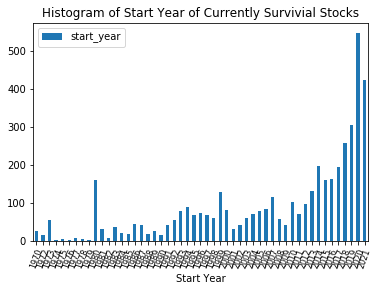

In [3]:
Start_Year=stock_start.groupby([stock_start["start_date"].dt.year]).count()
Start_Year=Start_Year.rename(columns={"start_date":"start_year"})
min_year=(stock_start["start_date"].min()).year
max_year=(stock_start["start_date"].max()).year
Start_Year.plot(kind="bar")
plt.title("Histogram of Start Year of Currently Survivial Stocks")
plt.xticks(rotation=70,fontsize=8)
plt.xlabel("Start Year")
plt.savefig("StartYear.png")

In [2]:
df=pd.read_excel("Stock_Price.xlsx", index_col=0,parse_dates=True)
df.index.name="dates"

In [3]:
df_fiveyear=df.loc[dt.datetime(2016,1,4):]

In [21]:
price_statistics=df_fiveyear.describe()

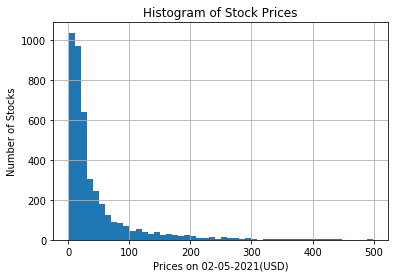

In [64]:
df_fiveyear.iloc[-1][df_fiveyear.columns[df_fiveyear.iloc[-1]<500]].hist(bins=50)
plt.xlabel("Prices on 02-05-2021(USD)")
plt.ylabel("Number of Stocks")
plt.title("Histogram of Stock Prices")
plt.savefig("PriceHistogram.png")

In [67]:
Fiveyear_profit=(df_fiveyear.iloc[-1]/df_fiveyear.iloc[0]-1)*100

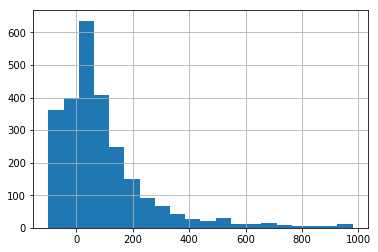

In [93]:
Fiveyear_profit[Fiveyear_profit<1000].hist(bins=20)

Analysis of Stock IROBOT

In [107]:
rolling_average=df_fiveyear["IRBT"].rolling(20).mean()
rolling_std=df_fiveyear["IRBT"].rolling(20).std()
upper=rolling_average+2*rolling_std
lower=rolling_average-2*rolling_std

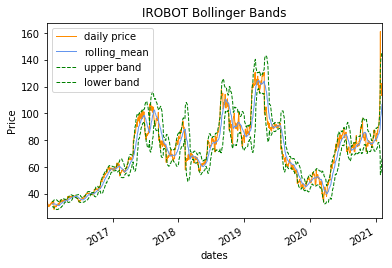

In [132]:
ax=df_fiveyear["IRBT"].plot(title="IROBOT Bollinger Bands",label="daily price",color='darkorange',lw=1)
ax.set_xlabel("Dates")
ax.set_ylabel("Price")
rolling_average.plot(ax=ax,label="rolling_mean",color="cornflowerblue",lw=1)
upper.plot(ax=ax,label="upper band",color='green',ls="--",lw=1)
lower.plot(ax=ax,label="lower band",color='green',ls='--',lw=1)
plt.legend(loc="upper left")
plt.savefig("IROBOT_BB.png")

In [13]:
daily_return=df_fiveyear[["IRBT","SPY"]].copy()
daily_return[1:]=(df_fiveyear[["IRBT","SPY"]].iloc[1:]/df_fiveyear[["IRBT","SPY"]].iloc[:-1].values)-1
daily_return.iloc[0]=0

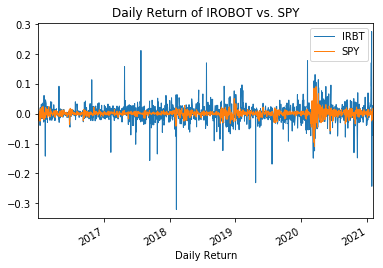

In [17]:
daily_return.plot(lw=1)
plt.xlabel("Daily Return")
plt.title("Daily Return of IROBOT vs. SPY")
plt.savefig("IROBOTDR.png")

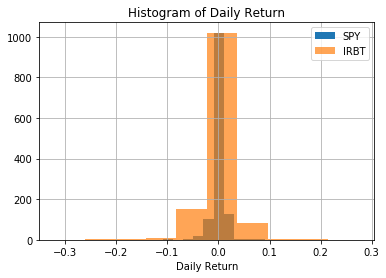

In [36]:
daily_return["SPY"].hist(label="SPY",alpha=1)
daily_return["IRBT"].hist(label="IRBT",alpha=0.7)
plt.legend()
plt.xlabel("Daily Return")
plt.title("Histogram of Daily Return")
plt.savefig("IRBTHisDR.png")

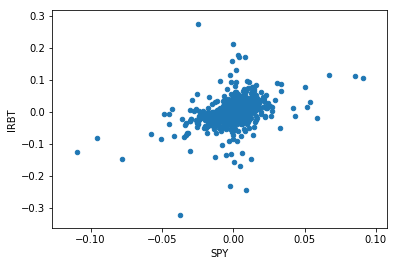

In [44]:
daily_return.plot(kind='scatter',x='SPY',y='IRBT')
plt.show()

In [43]:
sharp_ratio_IRBT=math.sqrt(252)*daily_return['IRBT'].mean()/daily_return['IRBT'].std()
sharp_ratio_SPY=math.sqrt(252)*daily_return['SPY'].mean()/daily_return['SPY'].std()
print("Sharp Ratio of IRBT:", sharp_ratio_IRBT,sharp_ratio_SPY)

0.7303880876320477 0.8815377414810647
